# Data Cleaning

In [1]:
import pandas as pd

In [4]:
pwd

'C:\\Users\\asus\\Desktop\\Untitled Folder\\Movie Recc'

In [8]:
movies=pd.read_csv('ml-latest-small\\movies.csv')

In [9]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
ratings=pd.read_csv('ml-latest-small\\ratings.csv')

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [90]:
ratings['userId'].nunique()

610

In [44]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [14]:
links=pd.read_csv('ml-latest-small\\links.csv')

In [15]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [24]:
tags=pd.read_csv('ml-latest-small\\tags.csv')

In [25]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [42]:
grp=tags.groupby('tag').filter(lambda x : len(x)>20)

In [33]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Tags are too random to get any valueable information from them

In [45]:
genres=movies['genres']

In [46]:
genres

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

Genres are null for more than 90% of our data, so its better to drop the column

In [51]:
movies.drop('genres',inplace=True,axis=1)

In [52]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [53]:
df = pd.merge(movies,ratings,on='movieId')

In [57]:
df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.0,964982703
1,1,Toy Story (1995),5,4.0,847434962
2,1,Toy Story (1995),7,4.5,1106635946
3,1,Toy Story (1995),15,2.5,1510577970
4,1,Toy Story (1995),17,4.5,1305696483


In [55]:
df[df['movieId']==2]

,movieId,title,userId,rating,timestamp
215,2,Jumanji (1995),6,4.0,845553522
216,2,Jumanji (1995),8,4.0,839463806
217,2,Jumanji (1995),18,3.0,1455617462
218,2,Jumanji (1995),19,3.0,965704331
219,2,Jumanji (1995),20,3.0,1054038313
...,...,...,...,...,...
320,2,Jumanji (1995),600,4.0,1237764627
321,2,Jumanji (1995),602,4.0,840875851
322,2,Jumanji (1995),604,5.0,832080293
323,2,Jumanji (1995),605,3.5,1277176522


# Data Visualisation

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

<AxesSubplot:xlabel='tag', ylabel='count'>

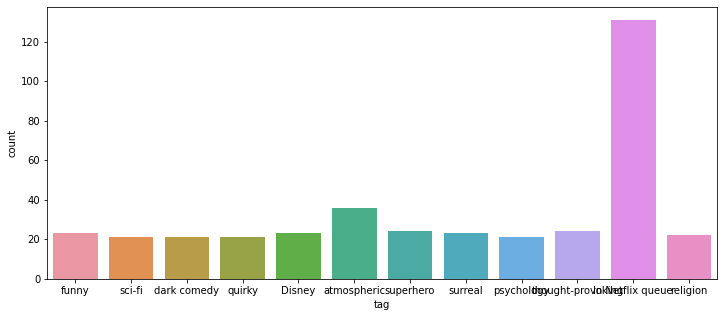

In [43]:
plt.figure(figsize=(12,5))
sns.countplot(x='tag',data=grp)

<AxesSubplot:xlabel='rating', ylabel='count'>

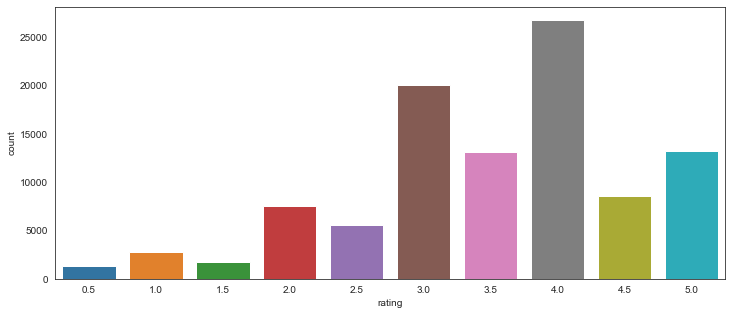

In [60]:
plt.figure(figsize=(12,5))
sns.countplot(x='rating',data=df)

Highly Rated movies

In [61]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Most rated movies

In [62]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [70]:
avg_rats=pd.DataFrame(df.groupby(by='title')['rating'].mean())
avg_rats.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [71]:
avg_rats['num_of_ratings']= pd.DataFrame(df.groupby('title')['rating'].count())

In [73]:
avg_rats.head()

,rating,num_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:xlabel='rating', ylabel='Count'>

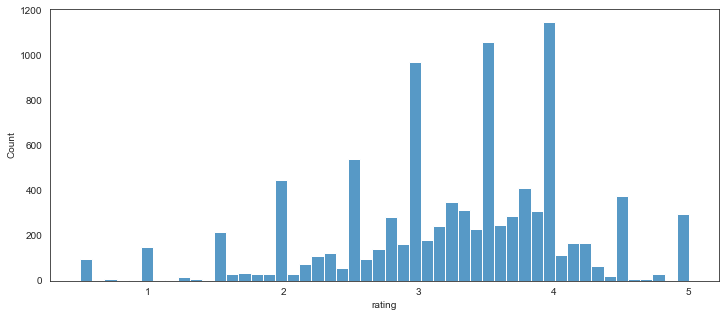

In [79]:
plt.figure(figsize=(12,5))
sns.histplot(x='rating',data=avg_rats,bins=50)

<AxesSubplot:xlabel='num_of_ratings', ylabel='Count'>

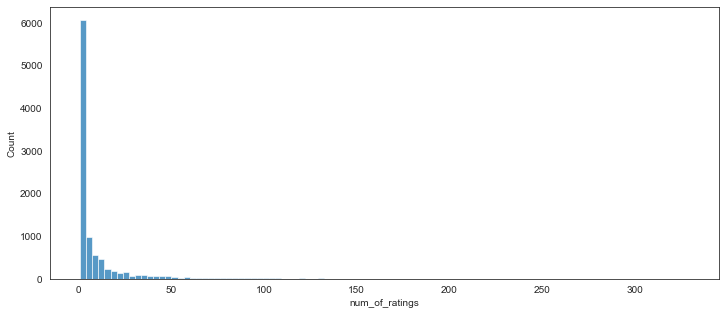

In [85]:
plt.figure(figsize=(12,5))
sns.histplot(x='num_of_ratings',data=avg_rats,bins=100)

In [83]:
avg_rats.describe()

,rating,num_of_ratings
count,9719.000000,9719.000000
mean,3.262388,10.375141
std,0.870004,22.406220
min,0.500000,1.000000
25%,2.800000,1.000000
50%,3.416667,3.000000
75%,3.910357,9.000000
max,5.000000,329.000000


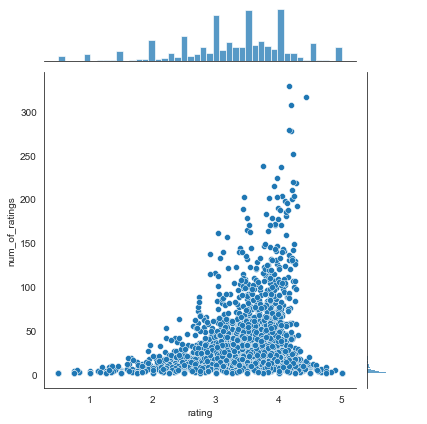

In [86]:
sns.jointplot(x='rating',y='num_of_ratings',data=avg_rats)

# Simple Recommender

In [87]:
matrix=pd.pivot_table(data=df,index='userId',columns='title',values='rating')

In [88]:
matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [94]:
avg_rats.sort_values('num_of_ratings',ascending=False).head(10)

,rating,num_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Say we want movies similar to Jurassic Park 1993

In [178]:
matrix['Matrix Reloaded, The (2003)'].dropna().mean()

3.3541666666666665

In [161]:
matrix_rats=matrix['Matrix, The (1999)']
matrix_rats.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [165]:
similar=matrix.corrwith(matrix_rats)
similar.head(10)
similar_df=pd.DataFrame(similar,columns=['correlation'])

C:\Users\asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [166]:
similar_df.dropna(inplace=True)
similar_df.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [167]:
similar_df.sort_values(by='correlation',ascending=False)

,correlation
title,
Haywire (2011),1.0
Highway 61 (1991),1.0
World on a Wire (Welt am Draht) (1973),1.0
"War Zone, The (1999)",1.0
"Hitcher, The (1986)",1.0
...,...
Bad Moms (2016),-1.0
Little Monsters (1989),-1.0
Tammy (2014),-1.0


Lets convert this series to a Data Frame. Also not all the movies with 1.0 corr will be similar as only a single person might've watched it. So we take no of ratings also into account

In [168]:
similar_df.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [169]:
avg_rats.head()

,rating,num_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [170]:
similar_df=pd.merge(similar_df,avg_rats,on='title')

In [171]:
similar_df[similar_df['num_of_ratings']>100].head(10)

,correlation,rating,num_of_ratings
title,,,
2001: A Space Odyssey (1968),0.137756,3.894495,109
Ace Ventura: Pet Detective (1994),0.115101,3.040373,161
Aladdin (1992),0.144000,3.792350,183
Alien (1979),0.248962,3.969178,146
Aliens (1986),0.470865,3.964286,126
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.228570,4.183333,120
American Beauty (1999),0.260836,4.056373,204
American History X (1998),0.263455,4.217054,129
American Pie (1999),0.216235,3.378641,103


In [175]:
similar_df[similar_df['num_of_ratings']>30].sort_values(by='correlation',ascending=False)

,correlation,rating,num_of_ratings
title,,,
"Matrix, The (1999)",1.000000,4.192446,278
Zootopia (2016),0.760610,3.890625,32
Life of Pi (2012),0.710196,3.629032,31
Tommy Boy (1995),0.674887,3.780000,50
Iron Man 3 (2013),0.657786,3.562500,32
...,...,...,...
Arachnophobia (1990),-0.387551,2.811321,53
Insomnia (2002),-0.389663,3.303030,33
Miracle on 34th Street (1994),-0.399772,3.223684,38


We can see this isnt the most accurate model even though it shows us some similar movies